In [1]:
import enzope as ezp
from enzope.graphs.graph_class import GTG
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy import stats

In [100]:
def custom_distance(u_pos, v_pos):
    # Calculate distance using custom formula for torus-like boundary conditions
    boundary_size = 1
    distance = 0
    for i in range(len(u_pos)):
        delta = abs(u_pos[i] - v_pos[i])
        delta = min(delta, boundary_size - delta)  # Consider the shortest wrap-around distance
        distance += delta ** 2
    return math.sqrt(distance)

def r1(x):
    return x**(-1)

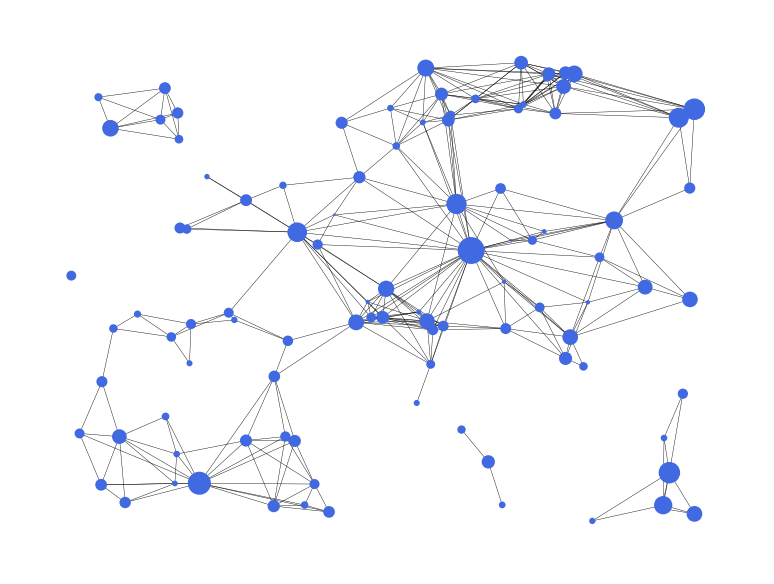

In [11]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10)
gtg2.plot_snapshot()

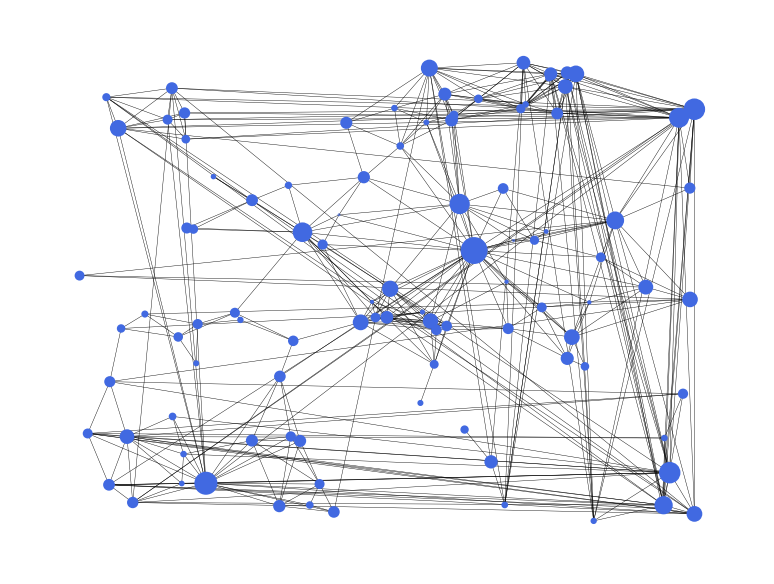

In [12]:
gtg2 = GTG(n_nodes=100, theta=70, plotable=True, seed=10, metric=custom_distance)
gtg2.plot_snapshot()

In [117]:
n_nodes = 10000
gtg = GTG(n_nodes=n_nodes, theta=7000, plotable=True, metric=custom_distance, seed=10)
# gtg2 = GTG(n_nodes=n_nodes, theta=100, plotable=True, p_dist=r1, metric=custom_distance, seed=10)
gtg3 = GTG(n_nodes=n_nodes, theta=7000, plotable=True, metric=custom_distance, join='mul', seed=10)
# gtg4 = GTG(n_nodes=n_nodes, theta=100, plotable=True, p_dist=r1, metric=custom_distance, join='mul', seed=10)
# gtg.plot_snapshot()

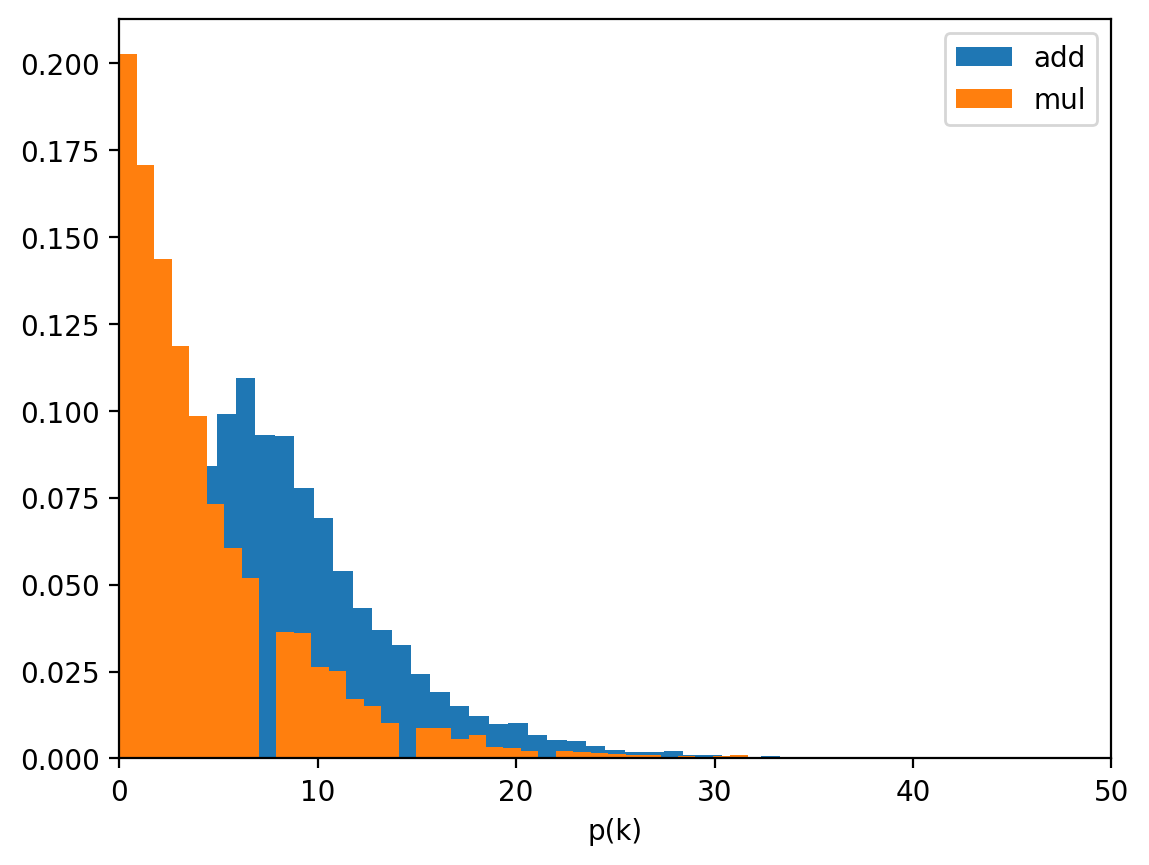

In [122]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()));
# n_neighs2 = np.array(list(dict(nx.degree(gtg2.G)).values()));
n_neighs3 = np.array(list(dict(nx.degree(gtg3.G)).values()));
# n_neighs4 = np.array(list(dict(nx.degree(gtg4.G)).values()));
fig, ax = plt.subplots(dpi=200)
plt.xlim(0, 50)
plt.xlabel('p(k)')
plt.hist(n_neighs, bins=50, density=True, label='add');
# plt.hist(n_neighs2, bins=50, density=True, label='add-r1');
plt.hist(n_neighs3, bins=50, density=True, label='mul');
# plt.hist(n_neighs4, bins=50, density=True, label='mul-r1');
plt.legend()

## 13/11: Analisis de GTGs

In [8]:
# Parametros de distr de Pareto
# f(w) = (a/m) * (w/m)^-(a+1)
a, m = 1.5, 1  # shape and mode

### Conectividad en función de tamaño (pesos exponenciales)

In [4]:
sizes = np.arange(100, 10000, 500)

redes_add1 = [GTG(n_nodes=size, theta=500) for size in sizes]
redes_mul1 = [GTG(n_nodes=size, theta=500, join='mul') for size in sizes]
ks_add1 = [redes_add1[i].get_mean_connectivity() for i in range(len(redes_add1))]
ks_mul1 = [redes_mul1[i].get_mean_connectivity() for i in range(len(redes_mul1))]
redes_add2 = [GTG(n_nodes=size, theta=1000) for size in sizes]
redes_mul2 = [GTG(n_nodes=size, theta=1000, join='mul') for size in sizes]
ks_add2 = [redes_add2[i].get_mean_connectivity() for i in range(len(redes_add2))]
ks_mul2 = [redes_mul2[i].get_mean_connectivity() for i in range(len(redes_mul2))]
redes_add3 = [GTG(n_nodes=size, theta=5000) for size in sizes]
redes_mul3 = [GTG(n_nodes=size, theta=5000, join='mul') for size in sizes]
ks_add3 = [redes_add3[i].get_mean_connectivity() for i in range(len(redes_add3))]
ks_mul3 = [redes_mul3[i].get_mean_connectivity() for i in range(len(redes_mul3))]
# Lo mismo para una red con pesos tipo ley de potencias
weights = [dict(enumerate((np.random.default_rng().pareto(a, size) + 1) * m)) for size in sizes]
redes_add_par = [GTG(n_nodes=size, theta=5000, w0=weights[i]) for i, size in enumerate(sizes)]
redes_mul_par = [GTG(n_nodes=size, theta=5000, w0=weights[i], join='mul') for i, size in enumerate(sizes)]
ks_add_par = [redes_add_par[i].get_mean_connectivity() for i in range(len(redes_add_par))]
ks_mul_par = [redes_mul_par[i].get_mean_connectivity() for i in range(len(redes_mul_par))]

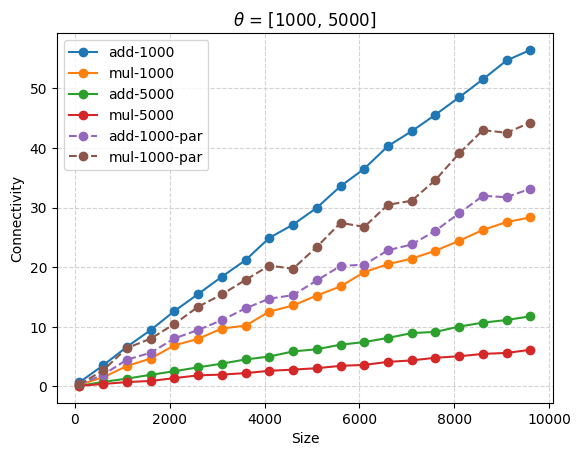

In [5]:
plt.title(r'${\theta}$ = [1000, 5000]')
# plt.plot(sizes, ks_add1, label='add-500', marker='o')
# plt.plot(sizes, ks_mul1, label='mul-500', marker='o', linestyle='--')
plt.plot(sizes, ks_add2, label='add-1000', marker='o')
plt.plot(sizes, ks_mul2, label='mul-1000', marker='o')
plt.plot(sizes, ks_add3, label='add-5000', marker='o')
plt.plot(sizes, ks_mul3, label='mul-5000', marker='o')
plt.plot(sizes, ks_add_par, label='add-1000-par', marker='o', linestyle='--')
plt.plot(sizes, ks_mul_par, label='mul-1000-par', marker='o', linestyle='--')
plt.xlabel('Size')
plt.ylabel('Connectivity')
plt.grid(color='lightgray', linestyle='--')
plt.legend();

### $\theta$ fijo, average_mean_distance en función del tamaño (small-worldness)

In [13]:
theta = 1000
new_sizes = []
new_sizes = np.append(np.arange(100, 300, 200), np.arange(300, 800, 50))
new_sizes = np.append(new_sizes, np.arange(1000, 2000, 300))
new_sizes

array([ 100,  300,  350,  400,  450,  500,  550,  600,  650,  700,  750,
       1000, 1300, 1600, 1900])

In [14]:
reps = 3
realizaciones_add = []
realizaciones_mul = []
realizaciones_add_par = []
realizaciones_mul_par = []


for i in range(reps):
    print(f"Realización {str(i+1)} de {reps}")
    redes_add = [GTG(n_nodes=size, theta=theta) for size in new_sizes]
    redes_mul = [GTG(n_nodes=size, theta=theta, join='mul') for size in new_sizes]
    
    weights = [dict(enumerate((np.random.default_rng().pareto(a, size) + 1) * m)) for size in new_sizes]
    redes_add_par = [GTG(n_nodes=size, theta=theta, w0=weights[i]) for i, size in enumerate(new_sizes)]
    redes_mul_par = [GTG(n_nodes=size, theta=theta, w0=weights[i], join='mul') for i, size in enumerate(new_sizes)]

    path_lengths_add = [redes_add[i].get_average_distance() for i in range(len(redes_add))]
    path_length_mul = [redes_mul[i].get_average_distance() for i in range(len(redes_mul))]
    path_lengths_add_par = [redes_add_par[i].get_average_distance() for i in range(len(redes_add_par))]
    path_length_mul_par = [redes_mul_par[i].get_average_distance() for i in range(len(redes_mul_par))]

    realizaciones_add.append(path_lengths_add)
    realizaciones_mul.append(path_length_mul)
    realizaciones_add_par.append(path_lengths_add_par)
    realizaciones_mul_par.append(path_length_mul_par)

Realización 1 de 3
Realización 2 de 3
Realización 3 de 3


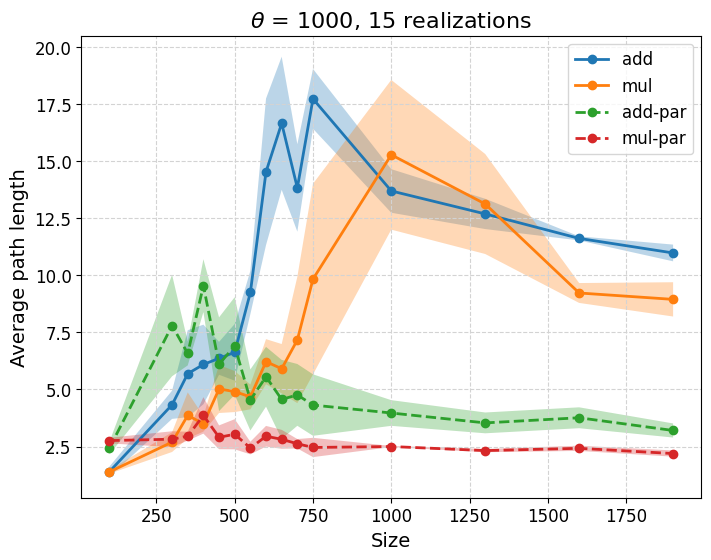

In [97]:
# fix this cell so that it plots Average distance vs Size with the mean of each realization and the std error
path_length_add = np.array(realizaciones_add).mean(axis=0)
path_length_mul = np.array(realizaciones_mul).mean(axis=0)
path_length_add_par = np.array(realizaciones_add_par).mean(axis=0)
path_length_mul_par = np.array(realizaciones_mul_par).mean(axis=0)

std_add = np.array(realizaciones_add).std(axis=0)
std_mul = np.array(realizaciones_mul).std(axis=0)
std_add_par = np.array(realizaciones_add_par).std(axis=0)
std_mul_par = np.array(realizaciones_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'${\theta}$ = 1000, 15 realizations', fontsize=16)

# Plot with shaded regions
plt.plot(new_sizes, path_length_add, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(new_sizes, path_length_add - std_add, path_length_add + std_add, alpha=0.3)

plt.plot(new_sizes, path_length_mul, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(new_sizes, path_length_mul - std_mul, path_length_mul + std_mul, alpha=0.3)

plt.plot(new_sizes, path_length_add_par, label='add-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(new_sizes, path_length_add_par - std_add_par, path_length_add_par + std_add_par, alpha=0.3)

plt.plot(new_sizes, path_length_mul_par, label='mul-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(new_sizes, path_length_mul_par - std_mul_par, path_length_mul_par + std_mul_par, alpha=0.3)

# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel('Size', fontsize=14)
plt.ylabel('Average path length', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot to a file (optional)
# plt.savefig('shaded_plot.svg')

plt.show()

### Falta: conectividad en funcion de theta, asortatividad, centralidad y clustering

In [89]:
thetas = np.arange(100, 2000, 100)

# Average connectivity
conn_add = []
conn_mul = []
conn_add_par = []
conn_mul_par = []

# Average clustering
clust_add = []
clust_mul = []
clust_add_par = []
clust_mul_par = []

# Average centrality
cent_add = []
cent_mul = []
cent_add_par = []
cent_mul_par = []

# Average assortativity
asor_add = []
asor_mul = []
asor_add_par = []
asor_mul_par = []


reps = 10
n_nodes = 1000

for rep in range(reps):
    print(f"Realización {str(rep+1)} de {reps}")
    redes_add_conn = [GTG(n_nodes=n_nodes, theta=theta) for theta in thetas]
    redes_mul_conn = [GTG(n_nodes=n_nodes, theta=theta, join='mul') for theta in thetas]
    
    weights = [dict(enumerate((np.random.default_rng().pareto(a, n_nodes) + 1) * m)) for _ in thetas]
    redes_add_conn_par = [GTG(n_nodes=n_nodes, theta=theta, w0=weights[i]) for i, theta in enumerate(thetas)]
    redes_mul_conn_par = [GTG(n_nodes=n_nodes, theta=theta, w0=weights[i], join='mul') for i, theta in enumerate(thetas)]
    
    conn_add.append([redes_add_conn[i].get_mean_connectivity() for i in range(len(redes_add_conn))])
    conn_mul.append([redes_mul_conn[i].get_mean_connectivity() for i in range(len(redes_mul_conn))])
    conn_add_par.append([redes_add_conn_par[i].get_mean_connectivity() for i in range(len(redes_add_conn_par))])
    conn_mul_par.append([redes_mul_conn_par[i].get_mean_connectivity() for i in range(len(redes_mul_conn_par))])

    clust_add.append([nx.average_clustering(redes_add_conn[i].G) for i in range(len(redes_add_conn))])
    clust_mul.append([nx.average_clustering(redes_mul_conn[i].G) for i in range(len(redes_mul_conn))])
    clust_add_par.append([nx.average_clustering(redes_add_conn_par[i].G) for i in range(len(redes_add_conn_par))])
    clust_mul_par.append([nx.average_clustering(redes_mul_conn_par[i].G) for i in range(len(redes_mul_conn_par))])

    cent_add.append([np.mean(list(nx.degree_centrality(redes_add_conn[i].G).values())) for i in range(len(redes_add_conn))])
    cent_mul.append([np.mean(list(nx.degree_centrality(redes_mul_conn[i].G).values())) for i in range(len(redes_mul_conn))])
    cent_add_par.append([np.mean(list(nx.degree_centrality(redes_add_conn_par[i].G).values())) for i in range(len(redes_add_conn_par))])
    cent_mul_par.append([np.mean(list(nx.degree_centrality(redes_mul_conn_par[i].G).values())) for i in range(len(redes_mul_conn_par))])

    asor_add.append([nx.degree_assortativity_coefficient(redes_add_conn[i].G) for i in range(len(redes_add_conn))])
    asor_mul.append([nx.degree_assortativity_coefficient(redes_mul_conn[i].G) for i in range(len(redes_mul_conn))])
    asor_add_par.append([nx.degree_assortativity_coefficient(redes_add_conn_par[i].G) for i in range(len(redes_add_conn_par))])
    asor_mul_par.append([nx.degree_assortativity_coefficient(redes_mul_conn_par[i].G) for i in range(len(redes_mul_conn_par))])

Realización 1 de 10
Realización 2 de 10
Realización 3 de 10
Realización 4 de 10
Realización 5 de 10
Realización 6 de 10
Realización 7 de 10
Realización 8 de 10
Realización 9 de 10
Realización 10 de 10


### Average connectivity

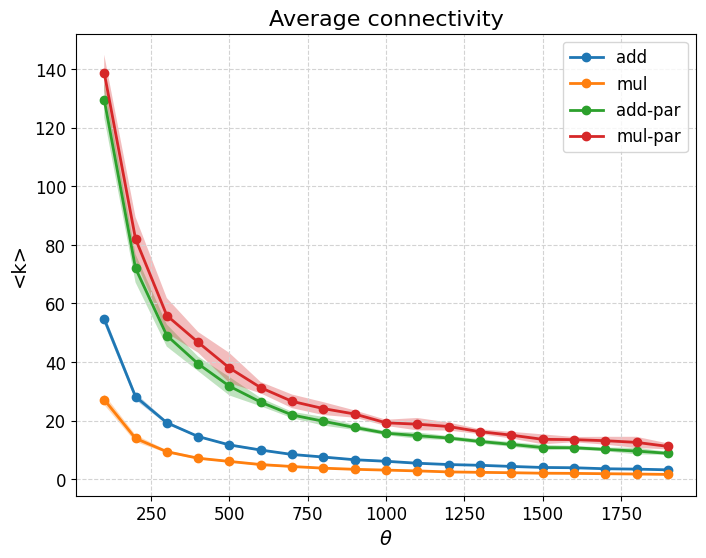

In [90]:
# Plotting connectivity vs theta
# Mean values
conn_add_mean = np.array(conn_add).mean(axis=0)
conn_mul_mean = np.array(conn_mul).mean(axis=0)
conn_add_par_mean = np.array(conn_add_par).mean(axis=0)
conn_mul_par_mean = np.array(conn_mul_par).mean(axis=0)

# Compute stds
conn_add_std = np.array(conn_add).std(axis=0)
conn_mul_std = np.array(conn_mul).std(axis=0)
conn_add_par_std = np.array(conn_add_par).std(axis=0)
conn_mul_par_std = np.array(conn_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Average connectivity', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, conn_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_add_mean - conn_add_std, conn_add_mean + conn_add_std, alpha=0.3)

plt.plot(thetas, conn_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, conn_mul_mean - conn_mul_std, conn_mul_mean + conn_mul_std, alpha=0.3)

plt.plot(thetas, conn_add_par_mean, label='add-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas, conn_add_par_mean - conn_add_par_std, conn_add_par_mean + conn_add_par_std, alpha=0.3)

plt.plot(thetas, conn_mul_par_mean, label='mul-par', marker='o', linestyle='--', linewidth=2)
plt.fill_between(thetas, conn_mul_par_mean - conn_mul_par_std, conn_mul_par_mean + conn_mul_par_std, alpha=0.3)


# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<k>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot to a file (optional)
# plt.savefig('shaded_plot.png', dpi=300, bbox_inches='tight')

### Average clustering

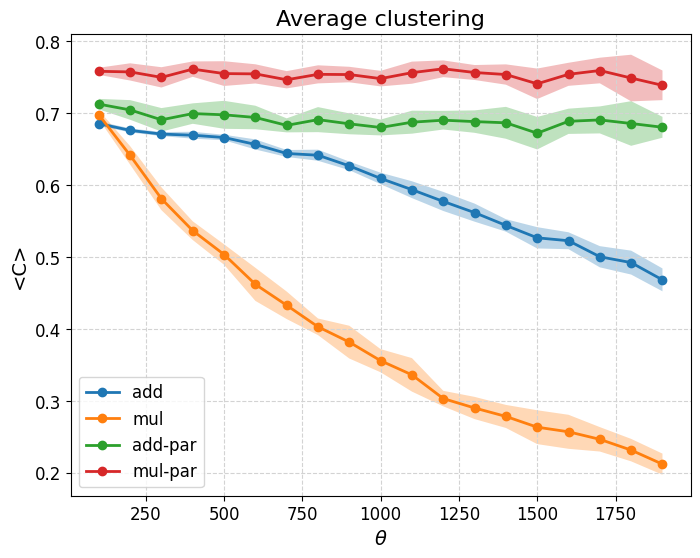

In [96]:
# Plot average clustering as a function of theta with fills
clust_add_mean = np.array(clust_add).mean(axis=0)
clust_mul_mean = np.array(clust_mul).mean(axis=0)
clust_add_par_mean = np.array(clust_add_par).mean(axis=0)
clust_mul_par_mean = np.array(clust_mul_par).mean(axis=0)

clust_add_std = np.array(clust_add).std(axis=0)
clust_mul_std = np.array(clust_mul).std(axis=0)
clust_add_par_std = np.array(clust_add_par).std(axis=0)
clust_mul_par_std = np.array(clust_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Average clustering', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, clust_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_add_mean - clust_add_std, clust_add_mean + clust_add_std, alpha=0.3)

plt.plot(thetas, clust_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_mul_mean - clust_mul_std, clust_mul_mean + clust_mul_std, alpha=0.3)

plt.plot(thetas, clust_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_add_par_mean - clust_add_par_std, clust_add_par_mean + clust_add_par_std, alpha=0.3)

plt.plot(thetas, clust_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, clust_mul_par_mean - clust_mul_par_std, clust_mul_par_mean + clust_mul_par_std, alpha=0.3)


# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<C>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot to a file (optional)
# plt.savefig('shaded_plot.png', dpi=300, bbox_inches='tight')

### Centrality

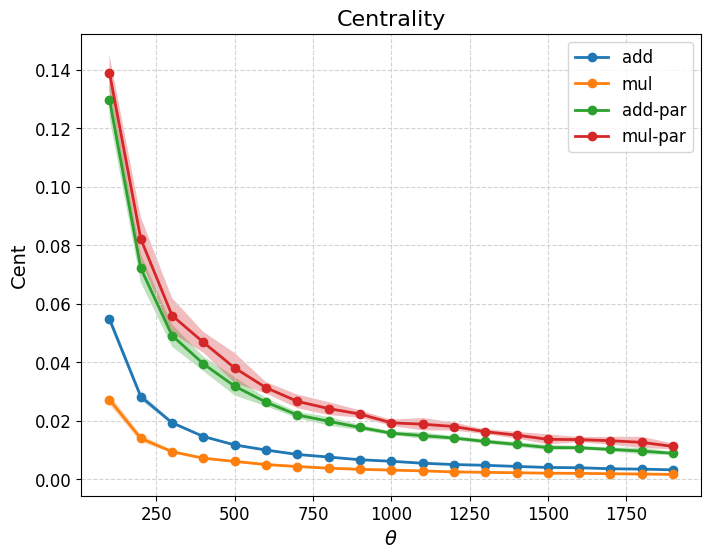

In [94]:
## Este es lo mismo que 

# Same plots for centrality
cent_add_mean = np.array(cent_add).mean(axis=0)
cent_mul_mean = np.array(cent_mul).mean(axis=0)
cent_add_par_mean = np.array(cent_add_par).mean(axis=0)
cent_mul_par_mean = np.array(cent_mul_par).mean(axis=0)

cent_add_std = np.array(cent_add).std(axis=0)
cent_mul_std = np.array(cent_mul).std(axis=0)
cent_add_par_std = np.array(cent_add_par).std(axis=0)
cent_mul_par_std = np.array(cent_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Centrality', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, cent_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_add_mean - cent_add_std, cent_add_mean + cent_add_std, alpha=0.3)

plt.plot(thetas, cent_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_mul_mean - cent_mul_std, cent_mul_mean + cent_mul_std, alpha=0.3)

plt.plot(thetas, cent_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_add_par_mean - cent_add_par_std, cent_add_par_mean + cent_add_par_std, alpha=0.3)

plt.plot(thetas, cent_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, cent_mul_par_mean - cent_mul_par_std, cent_mul_par_mean + cent_mul_par_std, alpha=0.3)


# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'Cent', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot to a file (optional)
# plt.savefig('shaded_plot.png', dpi=300, bbox_inches='tight')

### Assortativity

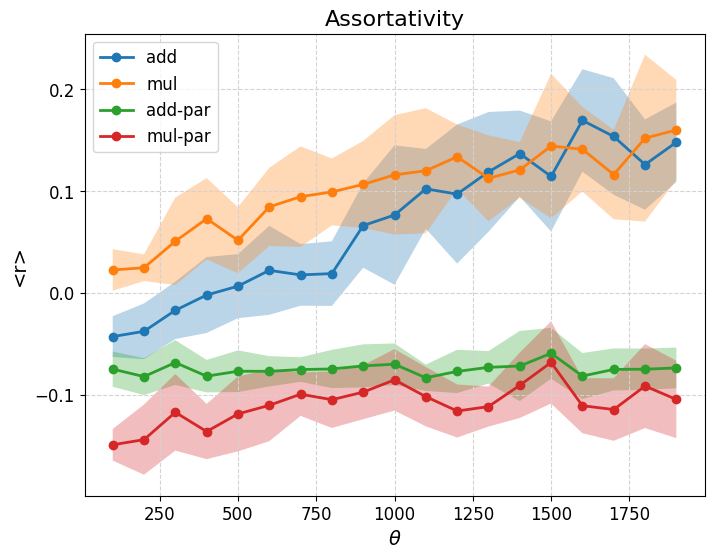

In [95]:
# Same plots for centrality
asor_add_mean = np.array(asor_add).mean(axis=0)
asor_mul_mean = np.array(asor_mul).mean(axis=0)
asor_add_par_mean = np.array(asor_add_par).mean(axis=0)
asor_mul_par_mean = np.array(asor_mul_par).mean(axis=0)

asor_add_std = np.array(asor_add).std(axis=0)
asor_mul_std = np.array(asor_mul).std(axis=0)
asor_add_par_std = np.array(asor_add_par).std(axis=0)
asor_mul_par_std = np.array(asor_mul_par).std(axis=0)

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.title(r'Assortativity', fontsize=16)

# Plot with shaded regions
plt.plot(thetas, asor_add_mean, label='add', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_add_mean - asor_add_std, asor_add_mean + asor_add_std, alpha=0.3)

plt.plot(thetas, asor_mul_mean, label='mul', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_mul_mean - asor_mul_std, asor_mul_mean + asor_mul_std, alpha=0.3)

plt.plot(thetas, asor_add_par_mean, label='add-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_add_par_mean - asor_add_par_std, asor_add_par_mean + asor_add_par_std, alpha=0.3)

plt.plot(thetas, asor_mul_par_mean, label='mul-par', marker='o', linestyle='-', linewidth=2)
plt.fill_between(thetas, asor_mul_par_mean - asor_mul_par_std, asor_mul_par_mean + asor_mul_par_std, alpha=0.3)


# Add legend with a larger font size
plt.legend(fontsize=12)

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'<r>', fontsize=14)

# Add grid with a lighter color
plt.grid(color='lightgray', linestyle='--')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot to a file (optional)
# plt.savefig('shaded_plot.png', dpi=300, bbox_inches='tight')